### Monterey Wharf 2 - Seasonal cycle

Start by importing libraries and reading data into a Pandas data frame.

In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'data_files/Monterey_Wharf2_shorestation_hourly.csv'
df = pd.read_csv(filename,parse_dates=[0])

The `unix_time` variable is the number of seconds since Jan-1-1970. The `Date_Time` variable contains the same times in in the DateTime64 format used by Numpy and Pandas. This is useful for plotting.

In [3]:
unix_time = np.array(df['unix_time'])
Date_Time = np.array(df['Date_Time'])
Temp = np.array(df['Temp']) # Temperature

Make a preliminary plot of the time series.

<IPython.core.display.Javascript object>


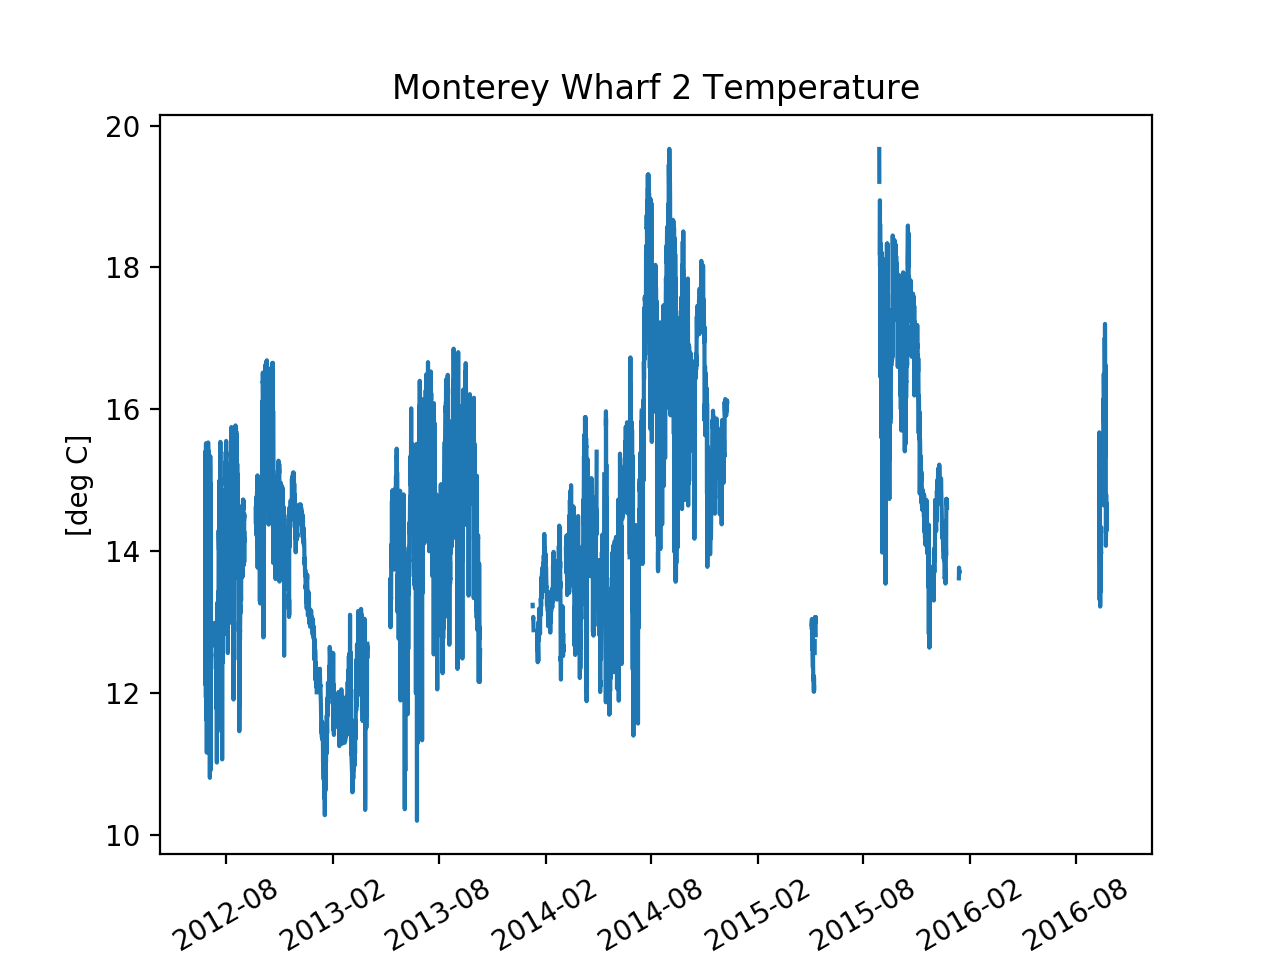

In [51]:
plt.figure()
plt.plot(Date_Time,Temp)
plt.ylabel('[deg C]')
plt.title('Monterey Wharf 2 Temperature')
plt.xticks(rotation=30);

In [27]:
import harmonic

In [62]:
t=np.array(unix_time)
y=np.array(Temp)
t_annual=31557600
ii = (np.isfinite(t) & np.isfinite(y))

c=harmonic.seasonal_fit(t[ii],y[ii],t_annual)

In [61]:
y_fit = c[0] + c[1]*t + c[2]*np.sin(2*np.pi*t/t_annual) + c[3]*np.cos(2*np.pi*t/t_annual)

<IPython.core.display.Javascript object>


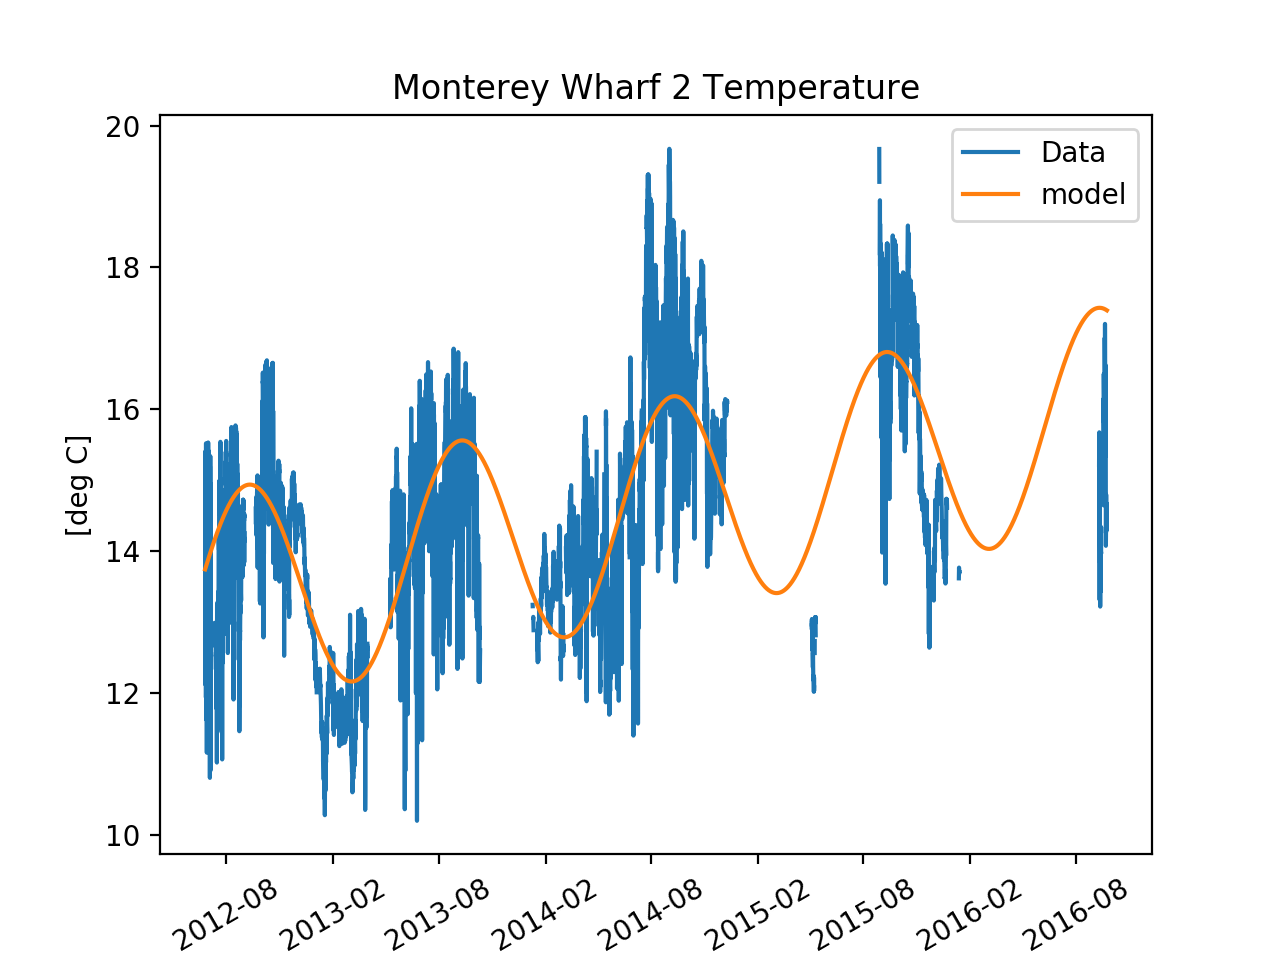

In [59]:
plt.figure()
plt.plot(Date_Time,Temp,label='Data')
plt.plot(Date_Time,y_fit,label='model')
plt.ylabel('[deg C]')
plt.title('Monterey Wharf 2 Temperature')
plt.xticks(rotation=30)
plt.legend()

In [78]:
residuals = y_fit-y

<IPython.core.display.Javascript object>


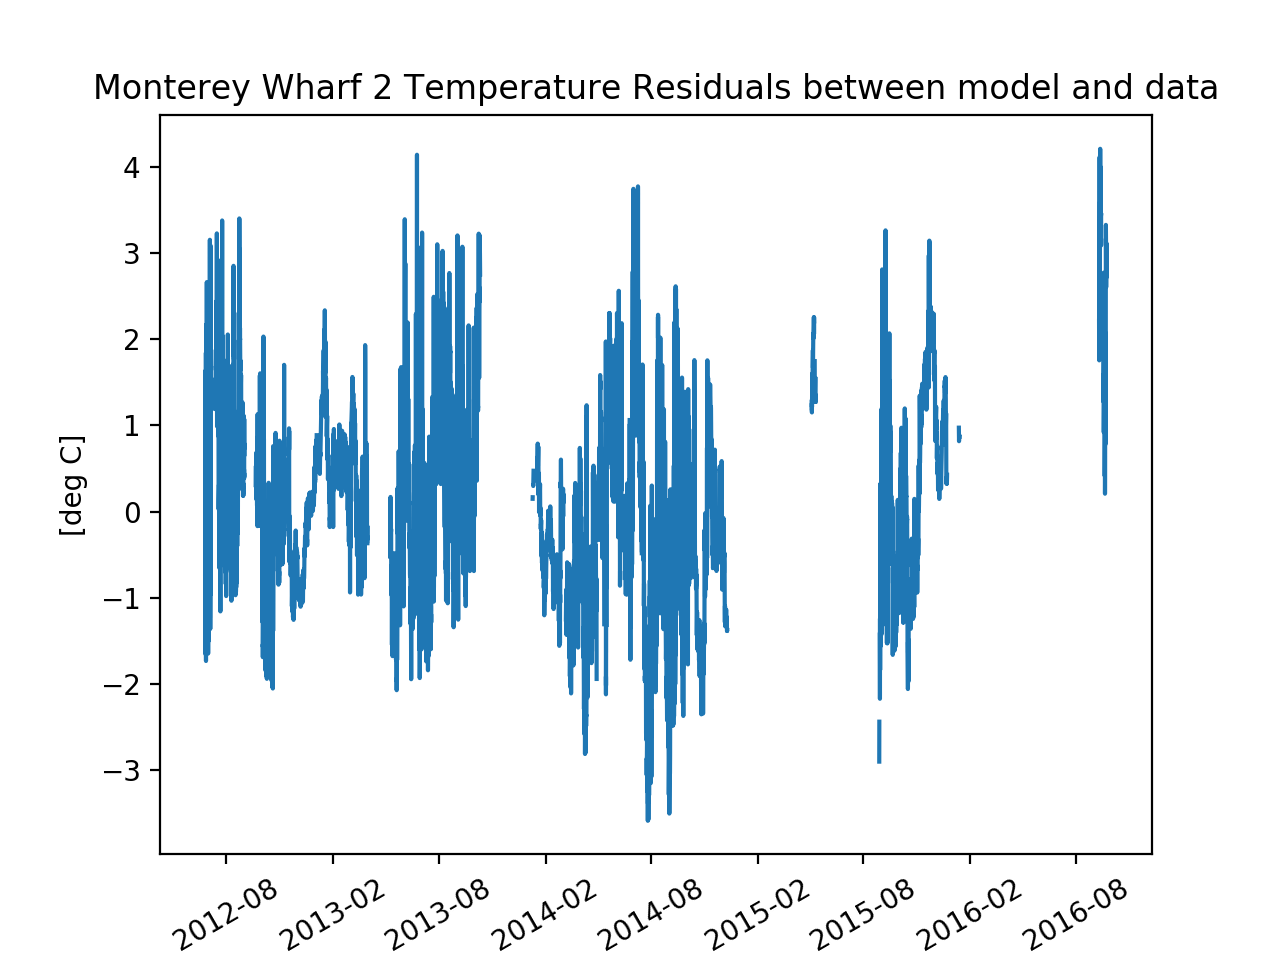

(array([ 734716.,  734900.,  735081.,  735265.,  735446.,  735630.,
         735811.,  735995.,  736177.]), <a list of 9 Text xticklabel objects>)

In [80]:
plt.figure()
plt.plot(Date_Time,residuals)
plt.ylabel('[deg C]')
plt.title('Monterey Wharf 2 Temperature Residuals between model and data')
plt.xticks(rotation=30)